# **1️⃣6️⃣ Bagging vs. Stacking in Ensemble Methods: Key Differences & Examples 🤖⚽🏀**

## **💡 Real-Life Analogy: Team of Coaches vs. Head Coach Strategy 🏆🎤**

- **Bagging** is like having **multiple independent assistant coaches** who each watch the game and give their own prediction based solely on their own observations. Later, you **average their opinions** to make a final decision. This approach reduces the variability (overfitting) of the prediction.  
- **Stacking** is like having several **specialist coaches** (each with a unique perspective, such as offense, defense, and strategy) whose predictions are then **combined by a head coach**. The head coach (meta-learner) learns the best way to weigh each specialist's opinion to make the final call.

📌 **Key Difference**:  
- **Bagging (Bootstrap Aggregating)** combines predictions from **independently trained models** by averaging or majority voting.  
- **Stacking** combines predictions by **training a meta-model** to optimally integrate the outputs of several base learners.

## **📌 What is Bagging?**

✅ **Bagging** (Bootstrap Aggregating) involves:  
- **Creating multiple subsets** of the training data (with replacement).  
- **Training individual models** (base learners) on each subset independently.  
- **Aggregating predictions** (e.g., by averaging for regression or voting for classification).  

**Real-Life Sports Example (Football ⚽):**  
- Imagine several assistant coaches each analyze **different subsets of match data** (maybe focusing on different time segments).  
- Each coach independently predicts whether the team will win or lose.  
- Finally, you **average their predictions** (or take a majority vote) to decide the final outcome.

## **📌 What is Stacking?**

✅ **Stacking** (Stacked Generalization) involves:  
- **Training multiple diverse models** (base learners) on the entire dataset.  
- **Collecting the predictions** of these models.  
- **Training a meta-learner** (or second-level model) on these predictions to learn the best way to combine them.  

**Real-Life Sports Example (NBA 🏀):**  
- Think of having specialist coaches: one focuses on scoring, one on defense, and one on assists/rebounds.  
- Each specialist gives their own prediction about whether a team will make the playoffs.  
- Then, the head coach (meta-learner) learns to combine these opinions—maybe weighting defense more heavily if that’s proven more predictive—to give a final decision.

## **📊 Comparison Table: Bagging vs. Stacking**

| Feature                      | **Bagging** 🏆                     | **Stacking** 🔗                         |  
|------------------------------|------------------------------------|-----------------------------------------|  
| **Method**                   | Independent model training on bootstrapped samples | Train diverse base models then combine using a meta-learner |  
| **Aggregation**              | Averaging (regression) or voting (classification) | Meta-model learns optimal combination weights |  
| **Goal**                     | Reduce variance and prevent overfitting | Reduce bias and leverage model diversity |  
| **Independence of Models**   | Models are trained **independently** | Models may be **heterogeneous** and are combined intelligently |  
| **Complexity**               | Relatively simple (ensemble of similar models) | More complex (requires training an additional layer) |  
| **Example Use-Case**         | Random Forests in sports outcome predictions | Stacking different algorithms to predict NBA playoff success |

## **🛠️ Python Code Example: Bagging vs. Stacking**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Set seed for reproducibility 🔒
np.random.seed(42)

In [2]:
# Generate synthetic sports data for win/loss prediction
# For example, features could represent stats such as Shots, Possession, and Defense metrics.
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# BAGGING Example: Using RandomForestClassifier as Base Learner
bagging_model = BaggingClassifier(
    estimator=RandomForestClassifier(n_estimators=10, random_state=42),
    n_estimators=20,
    random_state=42
)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"🏆 Bagging Model Accuracy: {accuracy_bagging*100:.2f}%")

🏆 Bagging Model Accuracy: 95.33%


In [4]:
# STACKING Example: Combining Diverse Models
# Define base learners
base_learners = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Meta-learner
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"🔗 Stacking Model Accuracy: {accuracy_stacking*100:.2f}%")

🔗 Stacking Model Accuracy: 95.33%


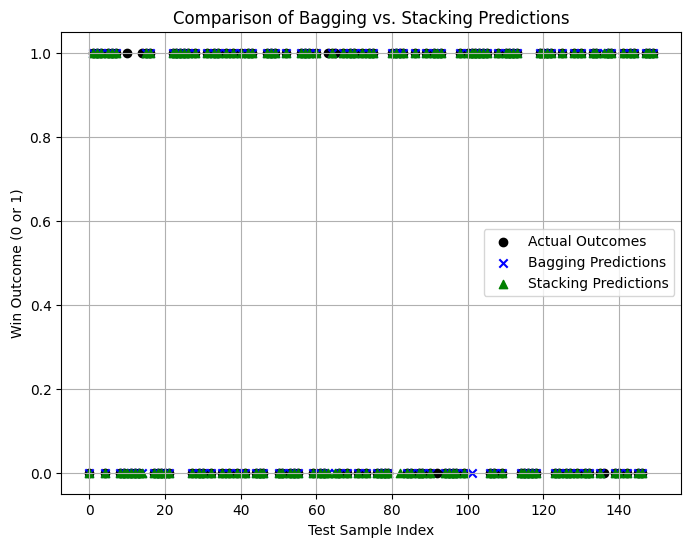

In [5]:
# Visualization: Comparison of Predictions
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='black', marker='o', label='Actual Outcomes')
plt.scatter(range(len(y_test)), y_pred_bagging, color='blue', marker='x', label='Bagging Predictions')
plt.scatter(range(len(y_test)), y_pred_stacking, color='green', marker='^', label='Stacking Predictions')
plt.xlabel("Test Sample Index")
plt.ylabel("Win Outcome (0 or 1)")
plt.title("Comparison of Bagging vs. Stacking Predictions")
plt.legend()
plt.grid(True)
plt.show()

### **Explanation of the Code & Visual Output:**
- **Data Generation**: We simulate a classification dataset that could represent sports match statistics (features) and win/loss outcomes (target).
- **BaggingClassifier**: Uses a RandomForestClassifier as a base estimator with multiple models trained on bootstrapped samples, and aggregates predictions via majority voting.
- **StackingClassifier**: Combines predictions from a Logistic Regression model and a Support Vector Classifier (SVC), with a meta-learner (Logistic Regression) that learns to optimally combine the base models' outputs.
- **Visualization**: A scatter plot compares the actual outcomes with predictions from both bagging and stacking methods, demonstrating their performance on the test data.

## **🔥 Final Takeaways**

1. **Bagging** 🏆:  
   - Trains multiple models on bootstrapped subsets independently.  
   - Aggregates via averaging/voting, reducing variance.  
   - Example: Random Forests for sports outcome prediction.  
2. **Stacking** 🔗:  
   - Combines diverse base learners with a meta-learner.  
   - Learns the best way to blend predictions, reducing bias and leveraging model diversity.  
   - Example: Combining Logistic Regression and SVC for NBA playoff prediction.  
3. **Choosing Between Them**:  
   - Use **Bagging** when you want to stabilize predictions and reduce overfitting.  
   - Use **Stacking** when you have diverse models and want to capture their complementary strengths.  
4. **Real-Life Impact in Sports**:  
   - **Football**: Bagging can help aggregate predictions from similar match data, while stacking can integrate insights from different tactical models.  
   - **NBA**: Stacking can combine statistical and video-based models to make more robust playoff predictions.  
   - **Poker**: Both methods could be used to aggregate different strategies or hand evaluation models for better decision-making.